In [2]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot
from onetwogo.plot import SortedPlot

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=True)

font = {'family':'CMU Serif', 
               #'sans-serif':['Helvetica'],
               'size': 11}

mpl.rc('font', **font)

jet = cm = plt.get_cmap('jet') 
cNorm  = mpl.colors.Normalize(vmin=0, vmax=1.5)
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)

In [4]:
#sns.set_style("ticks", {'font.family':'sans-serif', 
#               'font.sans-serif':['CMU Serif'],
#               'size': 11})

In [5]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.65,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
               'Iinit': 0.8,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 500,
              'delay': 500}

In [6]:
stimulus_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

In [7]:
range_extrashort = [100, 150, 200, 250, 300, 350, 400]
range_short = [400, 450, 500, 550, 600, 650, 700]
range_long = [700, 750, 800, 850, 900, 950, 1000]
mid_range = [550, 600, 650, 700, 750, 800, 850]
all_range = [400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
short_few = [400, 550, 700]
short_few2 = [400, 500, 600, 700]
all_few = [400, 500, 600, 700, 800, 900, 1000]
range_extralong = [900, 950, 1000, 1050, 1100, 1150, 1200]
range_extralong2 = [1400, 1450, 1500, 1550, 1600, 1650, 1700]

In [8]:
colors_short = [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7972318339100346, 0.20092272202998845, 0.3008073817762399, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.9966935793925413, 0.8975009611687812, 0.5770857362552863, 1.0),
 (1.0, 0.9803921568627451, 0.5529411764705883, 1.0)]

colors_long = [(1.0, 0.9803921568627451, 0.5529411764705883, 1.0),
 (0.9173394848135333, 0.9669357939254134, 0.6200692041522493, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0),
 (0.3280276816608997, 0.6805074971164936, 0.6802768166089965, 1.0),
 (0.2265282583621684, 0.4938869665513264, 0.7224913494809688, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

colors_all = [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7972318339100346, 0.20092272202998845, 0.3008073817762399, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.9966935793925413, 0.8975009611687812, 0.5770857362552863, 1.0),
 (1.0, 0.9803921568627451, 0.5529411764705883, 1.0),
 (0.9173394848135333, 0.9669357939254134, 0.6200692041522493, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0),
 (0.3280276816608997, 0.6805074971164936, 0.6802768166089965, 1.0),
 (0.2265282583621684, 0.4938869665513264, 0.7224913494809688, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

colors_mid = [(0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.9966935793925413, 0.8975009611687812, 0.5770857362552863, 1.0),
 (1.0, 0.9803921568627451, 0.5529411764705883, 1.0),
 (0.9173394848135333, 0.9669357939254134, 0.6200692041522493, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0)]

colors_few_short = [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0),
 (1.0, 0.9803921568627451, 0.5529411764705883, 1.0)]

colors_few_short2 = [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (1.0, 0.9803921568627451, 0.5529411764705883, 1.0)]

colors_few_all =  [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (1.0, 0.9803921568627451, 0.5529411764705883, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.3280276816608997, 0.6805074971164936, 0.6802768166089965, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

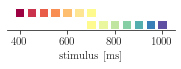

In [11]:
plt.figure(figsize=(3,1))
ax = plt.axes()

for stim,c in zip(range_short, colors_short):
    rectangle = plt.Rectangle((stim-20,0), 40, 40, fc=c) #,ec="red"
    plt.gca().add_patch(rectangle)
for stim,c in zip(range_long, colors_long):
    rectangle = plt.Rectangle((stim-20,-50), 40, 40, fc=c) #,ec="red"
    plt.gca().add_patch(rectangle)
    

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)

plt.xlabel('stimulus [ms]')

plt.axis('scaled')
#plt.savefig('../report/figures/trial.pdf', dpi=500, bbox_inches='tight')
plt.savefig('../report/figures/range.svg', dpi=500, bbox_inches='tight')
#plt.savefig('../report/figures/trial.png', dpi=500, bbox_inches='tight')

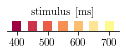

In [107]:
plt.figure(figsize=(2,1))
ax = plt.axes()

for stim,c in zip(range_short, colors_short):
    rectangle = plt.Rectangle((stim-15,10), 30, 30, fc=c) #,ec="red"
    plt.gca().add_patch(rectangle)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)

plt.title('stimulus [ms]', fontsize=11)
ax.locator_params(axis='x', nbins=4)

plt.axis('scaled')
plt.savefig('../report/figures/range_short.svg', dpi=500, bbox_inches='tight')

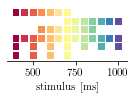

In [26]:
plt.figure(figsize=(3,1))
ax = plt.axes()

for stim,c in zip(range_short, colors_short):
    rectangle = plt.Rectangle((stim-20,200), 40, 40, fc=c) #,ec="red"
    plt.gca().add_patch(rectangle)
for stim,c in zip(range_long, colors_long):
    rectangle = plt.Rectangle((stim-20,150), 40, 40, fc=c) #,ec="red"
    plt.gca().add_patch(rectangle)
for stim,c in zip(mid_range, colors_mid):
    rectangle = plt.Rectangle((stim-20,100), 40, 40, fc=c) #,ec="red"
    plt.gca().add_patch(rectangle)
for stim,c in zip(all_range, colors_all):
    rectangle = plt.Rectangle((stim-20,50), 40, 40, fc=c) #,ec="red"
    plt.gca().add_patch(rectangle)
for stim,c in zip(short_few2, colors_few_short2):
    rectangle = plt.Rectangle((stim-20,-50), 40, 40, fc=c) #,ec="red"
    plt.gca().add_patch(rectangle)
for stim,c in zip(all_few, colors_few_all):
    rectangle = plt.Rectangle((stim-20,0), 40, 40, fc=c) #,ec="red"
    plt.gca().add_patch(rectangle)

    

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)

plt.xlabel('stimulus [ms]')

plt.axis('scaled')

plt.savefig('../report/figures/range_new.svg', dpi=500, bbox_inches='tight')

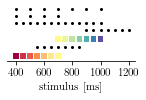

In [61]:
plt.figure(figsize=(3,1))
ax = plt.axes()

for stim,c in zip(range_short, colors_short):
    rectangle = plt.Rectangle((stim-20,150), 40, 40, fc=c) #,ec="red"
    plt.gca().add_patch(rectangle)
for stim,c in zip(range_long, colors_long):
    rectangle = plt.Rectangle((stim-20,270), 40, 40, fc=c) #,ec="red"
    plt.gca().add_patch(rectangle)
    
for stim in mid_range:
    ax.plot(stim, 230, 'o', c='k', markersize=2)
for stim in range_extralong:
        ax.plot(stim, 350, 'o', c='k', markersize=2)
for stim in all_range:
    ax.plot(stim, 400, 'o', c='k', markersize=2)
for stim in short_few2:
    ax.plot(stim, 450, 'o', c='k', markersize=2)
for stim in all_few:
    ax.plot(stim, 500, 'o', c='k', markersize=2)


ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)

ax.xaxis.set_ticks(np.arange(400, 1200+1, 200))

plt.xlabel('stimulus [ms]')

plt.axis('scaled')

plt.savefig('../report/figures/range_new3.svg', dpi=500, bbox_inches='tight')

# Stimulus List

In [11]:
# window 20, 90 %
stimulus_lst_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_lst_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

In [22]:
params = Params(ntrials=500)
expsim = ExperimentSimulation(params)

stimulus_range_s = [400, 450, 500, 550, 600, 650, 700]
stimulus_range_l = [700, 750, 800, 850, 900, 950, 1000]

stimulus_lst_short = expsim.find_stimulus_lst(range_short, 20, 0.9,'stimlst_short_400_700_7_b', True)
stimulus_lst_long = expsim.find_stimulus_lst(range_long, 20, 0.9, 'stimlst_long_700_1000_7_b', True)

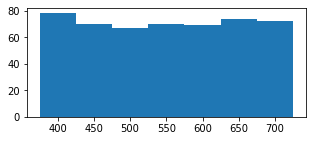

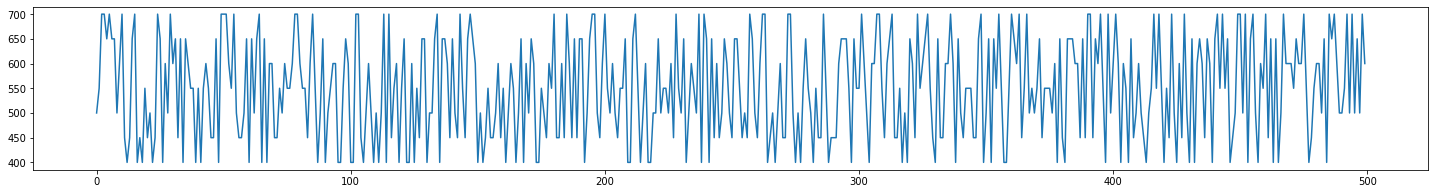

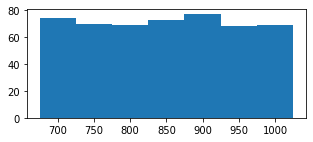

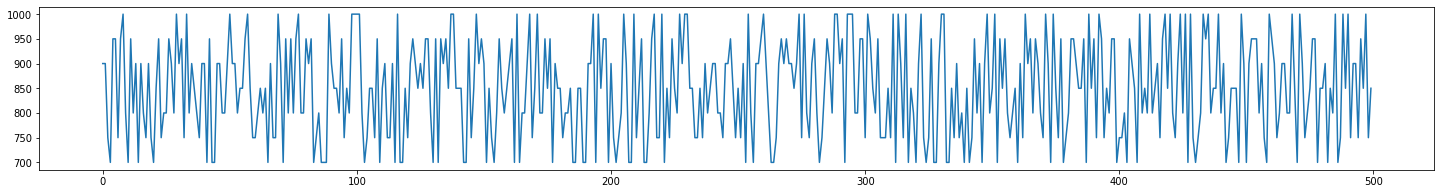

In [15]:
#a
plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_short, bins=7,  range=(stimulus_lst_short.min()-25, stimulus_lst_short.max()+25))
plt.show()
plt.figure(figsize=(25, 3))
plt.plot(stimulus_lst_short)

plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_long, bins=7,  range=(stimulus_lst_long.min()-25, stimulus_lst_long.max()+25))
plt.show()
plt.figure(figsize=(25, 3))
#bplt.plot(stimulus_lst_long)

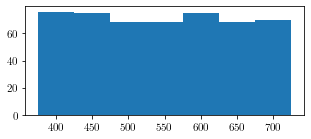

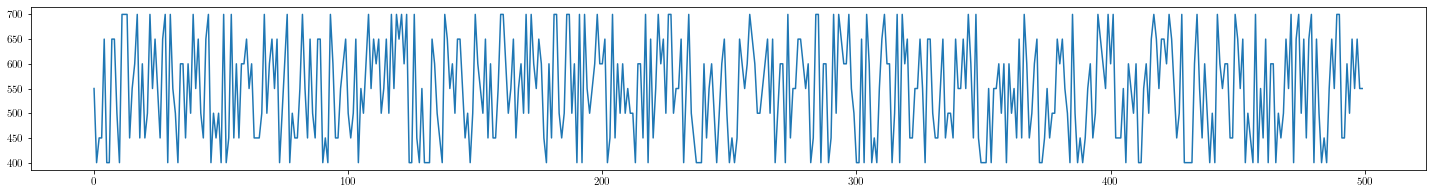

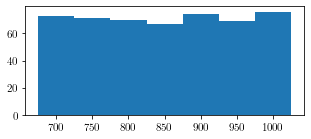

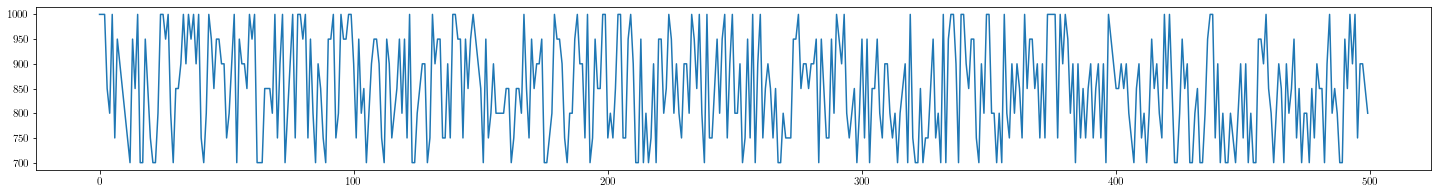

In [23]:
#b
plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_short, bins=7,  range=(stimulus_lst_short.min()-25, stimulus_lst_short.max()+25))
plt.show()
plt.figure(figsize=(25, 3))
plt.plot(stimulus_lst_short)

plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_long, bins=7,  range=(stimulus_lst_long.min()-25, stimulus_lst_long.max()+25))
plt.show()
plt.figure(figsize=(25, 3))
plt.plot(stimulus_lst_long)

## Different Ragne

In [8]:
params = Params(ntrials=500)
expsim = ExperimentSimulation(params)

In [ ]:
stimulus_lst_mid_range = expsim.find_stimulus_lst(mid_range, 20, 0.9, 'stimlst_mid_550_850', True)
stimulus_lst_short_few_short_range = expsim.find_stimulus_lst(short_few, 10, 0.9, 'stimlst_few_short_400_700', True)
stimulus_lst_short_few_all_range = expsim.find_stimulus_lst(all_few, 20, 0.9, 'stimlst_few_all_400_1000', True)
stimulus_lst_all_range = expsim.find_stimulus_lst(all_range, 40, 0.9, 'stimlst_all_400_1000', True)
stimulus_lst_extralong_range = expsim.find_stimulus_lst(range_extralong, 20, 0.9, 'stimlst_extralong_900_1200', True)

In [51]:
stimulus_lst_short_few_short2_range = expsim.find_stimulus_lst(short_few2, 10, 0.9, 'stimlst_few_short_400_700_2', True)

In [26]:
stimulus_lst_extralong_range2 = expsim.find_stimulus_lst(range_extralong2, 20, 0.9, 'stimlst_extralong_1400_1700', True)

In [35]:
stimulus_lst_extrashort = expsim.find_stimulus_lst(range_extrashort, 20, 0.9,'stimlst_extrashort_100_400', True)

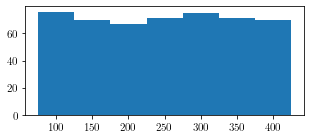

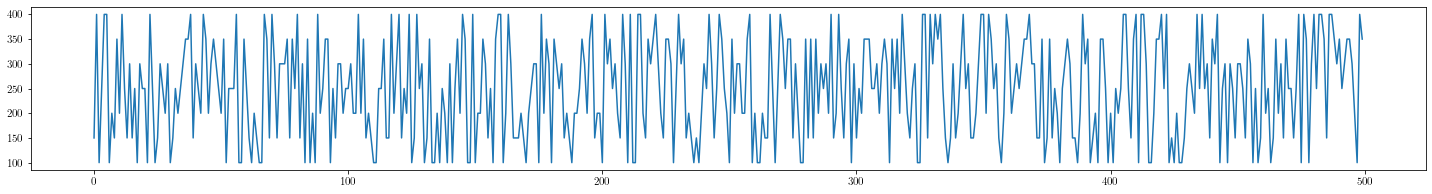

In [36]:
plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_extrashort, bins=7,  range=(stimulus_lst_extrashort.min()-25, stimulus_lst_extrashort.max()+25))
plt.show()
plt.figure(figsize=(25, 3))
plt.plot(stimulus_lst_extrashort)

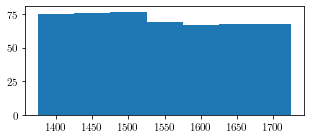

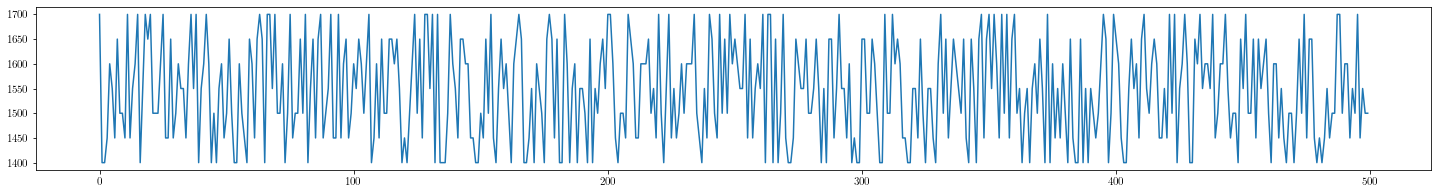

In [27]:
plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_extralong_range2, bins=7,  range=(stimulus_lst_extralong_range2.min()-25, stimulus_lst_extralong_range2.max()+25))
plt.show()
plt.figure(figsize=(25, 3))
plt.plot(stimulus_lst_extralong_range2)

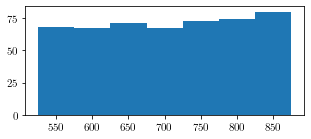

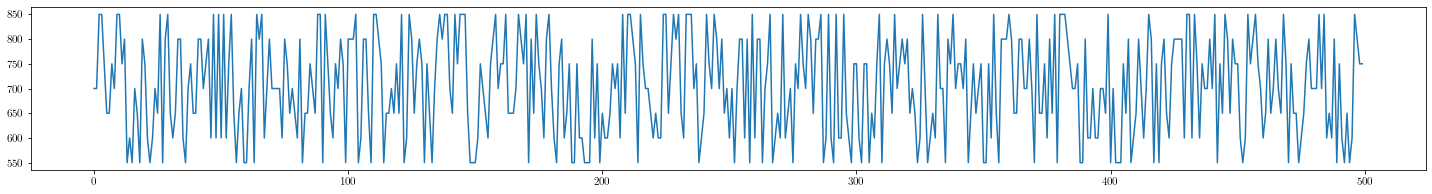

In [157]:
plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_mid_range, bins=7,  range=(stimulus_lst_mid_range.min()-25, stimulus_lst_mid_range.max()+25))
plt.show()
plt.figure(figsize=(25, 3))
plt.plot(stimulus_lst_mid_range)

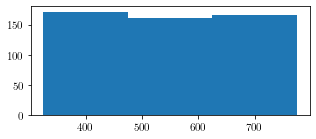

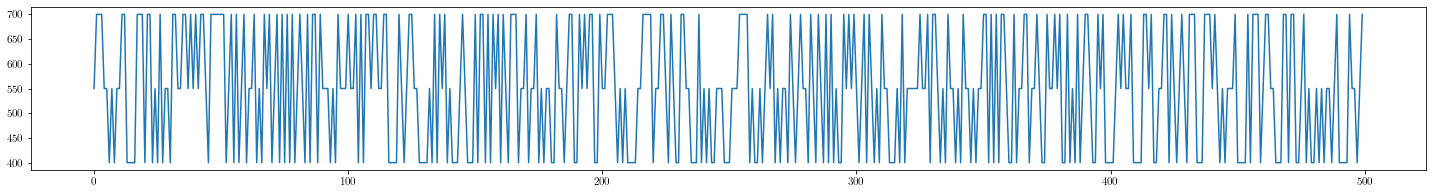

In [165]:
plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_short_few_short_range, bins=3,  range=(stimulus_lst_short_few_short_range.min()-75, stimulus_lst_short_few_short_range.max()+75))
plt.show()
plt.figure(figsize=(25, 3))
plt.plot(stimulus_lst_short_few_short_range)

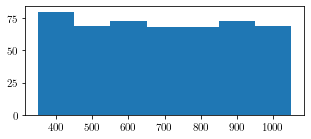

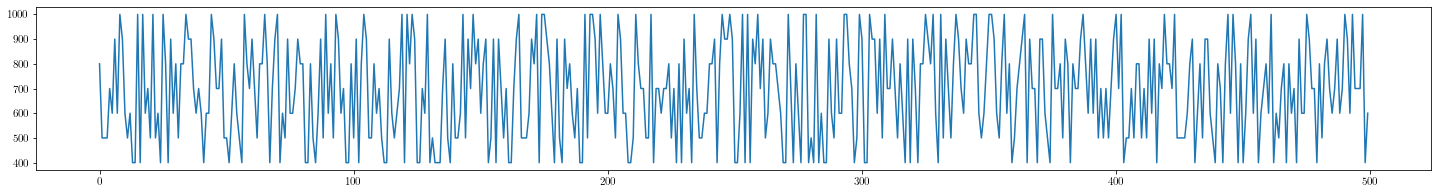

In [170]:
plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_short_few_all_range, bins=7,  range=(stimulus_lst_short_few_all_range.min()-50, stimulus_lst_short_few_all_range.max()+50))
plt.show()
plt.figure(figsize=(25, 3))
plt.plot(stimulus_lst_short_few_all_range)

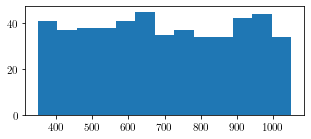

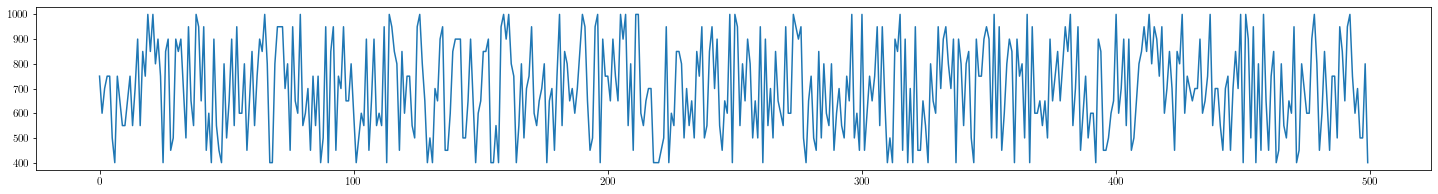

In [171]:
plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_all_range, bins=13,  range=(stimulus_lst_all_range.min()-50, stimulus_lst_all_range.max()+50))
plt.show()
plt.figure(figsize=(25, 3))
plt.plot(stimulus_lst_all_range)

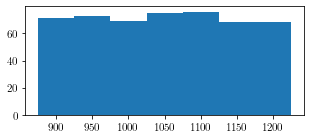

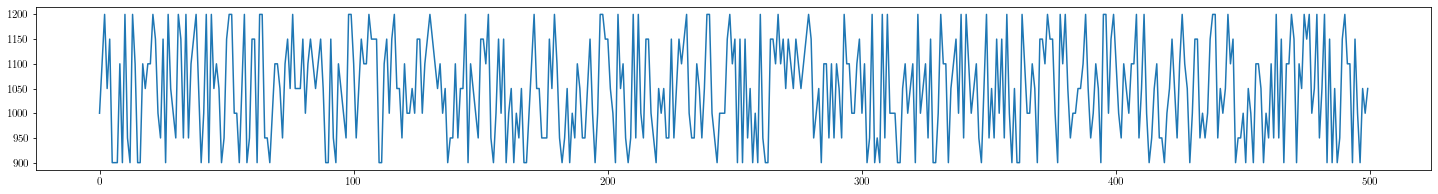

In [14]:
plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_extralong_range, bins=7,  range=(stimulus_lst_extralong_range.min()-25, stimulus_lst_extralong_range.max()+25))
plt.show()
plt.figure(figsize=(25, 3))
plt.plot(stimulus_lst_extralong_range)

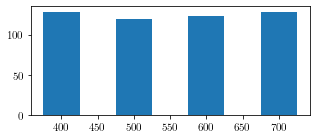

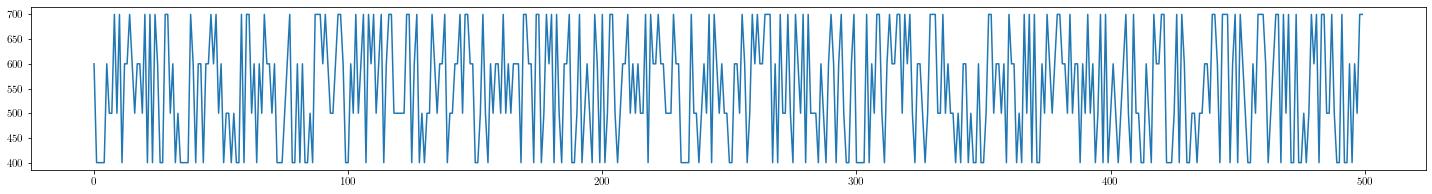

In [52]:
plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_short_few_short2_range, bins=7,  range=(stimulus_lst_short_few_short2_range.min()-25, stimulus_lst_short_few_short2_range.max()+25))
plt.show()
plt.figure(figsize=(25, 3))
plt.plot(stimulus_lst_short_few_short2_range)

# Experiment

In [78]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot
from onetwogo.plot import SortedPlot

Timeouts 0


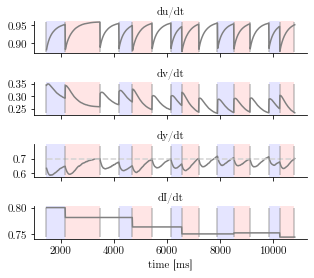

In [56]:
params = Params(ntrials=5, delay=700, tau=140, th=0.7, yinit=0.5)
expsim = ExperimentSimulation(params)

stimulus_lst = [400,500,400,600,400]
#stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
#stimulus_lst = [1000,400, 800, 400]

K = 5.0
alpha=1
exp_result = expsim.simulate(stimulus_lst, K)
plot = exp_result.create_simulation_plot()
plot.plot_trials(alpha)
plot.plot_measurement_production_frames()
plt.savefig('../report/figures/trial.svg', dpi=500, bbox_inches='tight')

In [48]:
stimulus_lst

[700, 500, 400, 600, 400]

In [49]:
exp_result.production

[70, 62, 53, 52, 53]

In [56]:
stimulus_lst_short[:12]

array([500, 550, 700, 700, 650, 700, 650, 650, 500, 600, 700, 450])

Timeouts 0


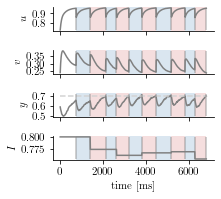

In [14]:
np.random.seed(0)
params = Params(ntrials=5, delay=0, tau=100, th=0.7, yinit=0.6, vinit=0.2, sigma=0.02)
expsim = ExperimentSimulation(params)

stimulus_lst = [650, 500, 600, 700, 450]
#stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
#stimulus_lst = [1000,400, 800, 400]

K = 5.0
alpha=1
exp_result = expsim.simulate(stimulus_lst, K)
plot = exp_result.create_simulation_plot()
plot.plot_trials(alpha)
plot.plot_measurement_production_frames()

plt.savefig('../defense/trial.svg', dpi=500, bbox_inches='tight')

In [131]:
exp_result.production #69+54+61+60+65+69+58+7

[69, 54, 61, 60, 65, 69, 58, 69, 54, 55, 65, 49]

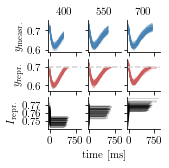

In [98]:
params = Params(ntrials=500, delay=700, tau=100, sigma=0.02, th=0.7)
expsimS = ExperimentSimulation(params)

K = 5
exp_resultS = expsimS.simulate(stimulus_short, K)

plot = SortedPlot(exp_resultS.create_sorted_data(2))
plot.plot_sorted_3()
plt.savefig('../report/figures/interI_dyn/short100mse_exp.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.4082000523965389


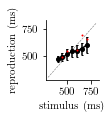

In [127]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=100, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(1.6,1.6))

K = 5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus (ms)', ylabel='reproduction (ms)')
ax.scatter([650, 500, 600, 700, 450],[690, 540, 550, 650, 490], c='r', s=1, zorder=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/trial_beh100.svg', dpi=500, bbox_inches='tight')

Timeouts 0


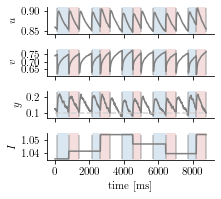

In [143]:
np.random.seed(0)
params = Params(ntrials=5, delay=700, tau=60, sigma=0.02, th=0.1, Iinit=1.04, IF=-500, uinit=0.8, vinit=0.6, yinit=0.1)
expsim = ExperimentSimulation(params)

stimulus_lst = [500, 550, 700, 700, 650, 700, 650, 650, 500, 600, 700, 450]
#stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
#stimulus_lst = [1000,400, 800, 400]

K = 4.0
alpha=1
exp_result = expsim.simulate(stimulus_lst, K)
plot = exp_result.create_simulation_plot()
plot.plot_trials(alpha)
plot.plot_measurement_production_frames()

plt.savefig('../report/figures/highI_dyn/trial.svg', dpi=500, bbox_inches='tight')

In [144]:
exp_result.production #74+62+56+70+64+56+65+7
#79+64+56+68+64+56+65+7
#56+45+63+70+60+55+68+7

[56, 45, 63, 70, 60, 55, 68, 60, 53, 47, 59, 55]

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.742370866763075


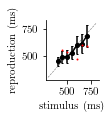

In [146]:
np.random.seed(0)
params = Params(ntrials=5, delay=700, tau=60, sigma=0.02, th=0.1, Iinit=1.04, IF=-500, uinit=0.8, vinit=0.6, yinit=0.1)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(1.6,1.6))

K = 4
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus (ms)', ylabel='reproduction (ms)')
ax.scatter([650, 500, 600, 700, 450],[600, 530, 470, 590, 550], c='r', s=1, zorder=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/highI_dyn/trial_beh60.svg', dpi=500, bbox_inches='tight')